<a href="https://colab.research.google.com/gist/annbinus/a16fc1e5b4aeada6d3513d350bc9439c/homework_01_ann_binus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PID: 5327525
# Name: Ann Binus
# Collaboration: None

# Regression Homework

This is the first assignment for CAP 4630 and we will develop two basic models with regression. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)**


**Task Overview:**
- Singal Variable Nonlinear Regression 
- Multiple Variable Linear Regression


## 1 - Packages ##

Import useful packages for scientific computing and data processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.


In [ ]:
# Coding here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2 - Data Preparation ##

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for nonlinear regression.
2. Generate the scatter plot of the data.

**Hints:**
1. The data file is "data_nonlinear.csv".
2. The data format is as follows: 1st column is X and 2nd column is Y.
3. You may follow the example in class.
![](https://drive.google.com/uc?export=view&id=1cLvYRY-NXtukcmi5Av8G2Mz6XOQsheUO)

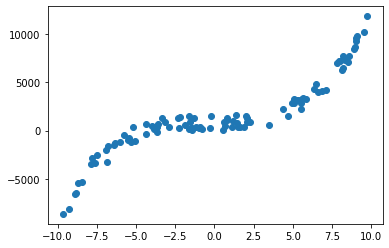

In [ ]:
# Coding here
# Load data
data = pd.read_csv("data_nonlinear.csv")

# Scatter plot of data
plt.scatter(data.X, data.Y)
plt.show()

## 3 - Single Variable Nonlinear Regression ##


Develop a regression model, estimate coefficients with data, and derive the relationship. **(30 Points)**

**Tasks:**
1. Establish a relationship between Y and X with a cubic function.
2. Compute MSE loss with observation-prediction pairs. 
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.000001 (1e-6)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step. 

**Hints:**  
1. Given the example of linear regression in class, modify the function to an equation for a spline with coefficients of **a** , **b**, **c** and **d** for cubic, qudractic, linear, and constant term.
2. Initialize the model with zero. For example, a=0, b=0, c=0 and d=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **a**, **b**, **c**, **d** for first five steps are as follows:

Epoch  0 :  2.8045093168662314 0.15006631239563697 0.04047903434004733 0.0030023401200892003 \
Epoch  1 :  4.905935374329749 0.2803623842843468 0.07068280026181122 0.0057565282228493 \
Epoch  2 :  6.480417434500056 0.395779237410925 0.09318576969022647 0.008323648642107889 \
Epoch  3 :  7.65996806232127 0.49998280146312246 0.10991745268097952 0.010749486523089888 \
Epoch  4 :  8.543527816733905 0.5957208253596222 0.12232397430880633 0.013068360586717544



In [ ]:
# Coding here

def cubic_func(x, a, b, c, d):
  return a * x**3 + b * x**2 + c * x + d

def mse_loss(y, y_pred):
  return np.mean((y - y_pred)**2)

a, b, c, d = 0, 0, 0, 0

lrate = 1e-6
epochs = int(1e4)

# Gradint descent
for epoch in range(epochs):

  y_pred = cubic_func(data.X, a, b, c, d)
  
  # MSE loss
  loss = mse_loss(data.Y, y_pred)
  
  da = -2 * np.mean((data.Y - y_pred) * (data.X**3))
  db = -2 * np.mean((data.Y - y_pred) * (data.X**2))
  dc = -2 * np.mean((data.Y - y_pred) * (data.X))
  dd = -2 * np.mean((data.Y - y_pred))
  a = a - lrate * da
  b = b - lrate * db
  c = c - lrate * dc
  d = d - lrate * dd

  # Print optimal solution
  print("Epoch", epoch, ":", a, b, c, d)

Epoch 0 : 2.804509316866232 0.15006631239563697 0.04047903434004731 0.0030023401200891995
Epoch 1 : 4.905935374329749 0.2803623842843468 0.07068280026181119 0.005756528222849298
Epoch 2 : 6.480417434500055 0.395779237410925 0.09318576969022645 0.008323648642107887
Epoch 3 : 7.659968062321269 0.49998280146312246 0.1099174526809795 0.010749486523089886
Epoch 4 : 8.543527816733905 0.5957208253596222 0.1223239743088063 0.013068360586717544
Epoch 5 : 9.205250502827887 0.6850529006311415 0.13148917305386368 0.015305995703679121
Epoch 6 : 9.70071278930127 0.7695228589767357 0.13822536142557662 0.017481675826667115
Epoch 7 : 10.071568182566443 0.8502879805096009 0.14314134908902038 0.01960985756661457
Epoch 8 : 10.34903507977835 0.928215832547894 0.14669342472827004 0.021701379533262375
Epoch 9 : 10.556510989208327 1.0039568481984809 0.1492235658513396 0.0237643687098273
Epoch 10 : 10.711531831925454 1.0779987224396965 0.1509880762133241 0.025804919761274935
Epoch 11 : 10.827240396069556 1.150

KeyboardInterrupt: ignored

## 4 - Prediction Results ##

Derive prediction function and generate estmated results. **(5 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

**Hint:**
1. You may follow the example in class materials.
2. An example is shown below.
![](https://drive.google.com/uc?export=view&id=1QmisJjMa2aDeoKSClCG90c2KZUDEKmuC)

<function matplotlib.pyplot.show(*args, **kw)>

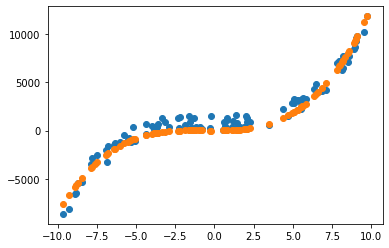

In [ ]:
# Coding here
# Prediction function
def pred_func(x):
  return cubic_func(x, a, b, c, d)

y_pred = pred_func(data.X)

# Scatter plot for original data and prediction data
plt.scatter(data.X, data.Y)
plt.scatter(data.X, y_pred)
plt.show

## 5 - Multiple Variables Linear Regression ##

## 5.1 Data Preparation

Prepare the data for regression task. **(10 Points)**

**Tasks:**
1. Load data for multiple variable linear regression.
2. Generate the 3D scatter plot of the data.

**Hints:**
1. The data file is "data_two_variables.csv".
2. The data format is as follows: 1st column is X1, 2nd column is X2, and 3rd colum is Y.
3. You may use "mplot3d" in the toolkit of "mpl_toolkits" and import "Axes3D" to faciliate 3D scatter plot. More details can be found in the reference of https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
4. [Optional, NO Credit]You may rotate the figure you generated by using "%matplotlib qt" before you plot it. Remember to install the related package by "!pip install PyQt5". Only work on Jupyter(locally). Does not work on Google Colab. [Reference Website](https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook)

![](https://drive.google.com/uc?export=view&id=1sHwWfZXpU3-8SqzFrmCxIvxmQWfe2Nns)
![](https://drive.google.com/uc?export=view&id=1OwHP0g-K2um-LnKiDhE6UfkDFxk4Opce)


<function matplotlib.pyplot.show(*args, **kw)>

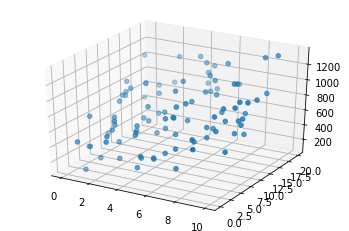

In [ ]:
# Coding here
from mpl_toolkits.mplot3d import Axes3D

# Load data
data_two = pd.read_csv('data_two_variables.csv')

x1 = data_two.X1.values
x2 = data_two.X2.values
y = data_two.Y.values

# 3D scatter plot of data
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(x1, x2, y)
plt.show


## 5.2 Linear Regression

Develop a regression model, estimate coefficients with data, and derive the relationship. **(30 Points)**

**Tasks:**
1. Establish a linear function to describe the relationship among Y, X1, and X2.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.001 (1e-3)** and **10000 (1e4)** epochs.
4. Print out the optimal solution at final step. 


**Hints:**  
1. Given the example of linear regression in class, modify the function to a linear equation with two independent variables X1 and X2. The coefficients of X1 and X2 are **m1** and **m2**, respectively. The constant term is **m3**.
2. Initialize the model with zero. For example, m1=0, m2=0, and m3=0.
3. It may take **10-15 seconds**  to finish the running for 10000 steps. Be patient.
4. For debugging, the results of **m1**, **m2**, and **m3** for first five steps are as follows:

Epoch 0: 7.43847600018326 15.595631430047339 1.4265844915879997 \
Epoch 1: 12.954483113402425 26.731746959534096 2.481143659135288 \
Epoch 2: 17.084193849045587 34.664109745712814 3.2680146970514863 \
Epoch 3: 20.213137348549306 40.2953527521597 3.8622050343066556 \
Epoch 4: 22.618552798604984 44.274269323103674 4.317638791453634 \
Epoch 5: 32.734943422646175 34.69592128962032 222.91661391579638

In [ ]:
# Coding here
# Initialize variables
m1, m2, m3 = 0, 0, 0

lrate = 1e-3
epochs = int(1e4)

# Gradient descent
for epoch in range(epochs):
  
  # Linear function
  y_pred = m1*x1 + m2*x2 + m3
  
  # MSE loss
  loss = np.mean((y - y_pred)**2)

  dm1 = (-2/len(y)) * np.sum((y - y_pred) * x1)
  dm2 = (-2/len(y)) * np.sum((y - y_pred) * x2)
  dm3 = (-2/len(y)) * np.sum(y - y_pred)

  m1 = m1 - lrate * dm1
  m2 = m2 - lrate * dm2
  m3 = m3 - lrate * dm3

  # Print optimal solution
  print("Epoch", epoch, ":", m1, m2, m3)

Epoch 0 : 7.43847600018326 15.595631430047344 1.4265844915880002
Epoch 1 : 12.954483113402423 26.731746959534103 2.481143659135288
Epoch 2 : 17.084193849045587 34.66410974571282 3.268014697051486
Epoch 3 : 20.213137348549306 40.29535275215971 3.862205034306655
Epoch 4 : 22.618552798604984 44.27426932310368 4.317638791453633
Epoch 5 : 24.49983444185925 47.06718627348913 4.673084592175723
Epoch 6 : 26.00041645938808 49.00926903265647 4.956416660971025
Epoch 7 : 27.22350456762907 50.341401331116415 5.187677835489625
Epoch 8 : 28.243384442440327 51.23669542554953 5.381281358131643
Epoch 9 : 29.113550628583116 51.8195484361849 5.547593595560238
Epoch 10 : 29.87254991454558 52.17934060100299 5.6940717500398295
Epoch 11 : 30.54818179303851 52.380281975502854 5.826081685099787
Epoch 12 : 31.160517942483967 52.46849051725613 5.947485807431411
Epoch 13 : 31.724072782868113 52.47708000528348 6.061065658033097
Epoch 14 : 32.24936379618476 52.42981736808839 6.168825687183621
Epoch 15 : 32.744033189

KeyboardInterrupt: ignored


## 5.3 - Prediction Results ##

Derive prediction function and generate estmated results. **(10 Points)**

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate 3D scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

**Hint:**
1. You may follow the example above.
2. An example is shown below.
![](https://drive.google.com/uc?export=view&id=1xAl7eJmDmFPTNipd0SljAdyHs3PhRiMg)
![](https://drive.google.com/uc?export=view&id=1Eb9qZqTCmAbwJUkoTQ6zPys3ezWqTCkr)

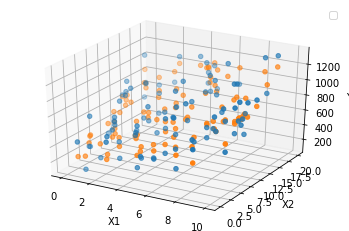

In [ ]:
# Coding here
# Prediction function
def predict(x1, x2, m1, m2, m3):
  return m1*x1 + m2*x2 + m3

y_pred = predict(x1, x2, m1, m2, m3)

# 3D scatter plot for orginal data and prediction data
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(x1, x2, y)
axes.scatter(x1, x2, y_pred)
axes.set_xlabel("X1")
axes.set_ylabel("X2")
axes.set_zlabel("Y")
plt.legend()
plt.show()